# **Step 1: Data Cleaning and Preperation**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving youtube_channel_real_performance_analytics.csv to youtube_channel_real_performance_analytics.csv


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Dataset
data = pd.read_csv('youtube_channel_real_performance_analytics.csv')
data.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


**Data Exploration**

In [ ]:
# data.size
data.shape              # (364, 70)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

**Data Cleaning**

In [ ]:
# Checking for missing values
print(data.isnull().sum())              # No null values

data = data.dropna()                    # Drop null values if any

# Drop Duplicates
print(data.duplicated().sum())         # No duplicates
data = data.drop_duplicates()          # Drop if any

# Categorize columns into logical groups (to avoid/reduce too many columns for better analysis )
video_metadata = ['ID', 'Video Duration', 'Video Publish Time', 'Days Since Publish', 'Day', 'Month', 'Year', 'Day of Week']
revenue_metrics = ['Revenue per 1000 Views (USD)', 'Estimated Revenue (USD)', 'Ad Impressions', 'Estimated AdSense Revenue (USD)', 'DoubleClick Revenue (USD)',
                   'YouTube Ads Revenue (USD)', 'Watch Page Ads Revenue (USD)', 'YouTube Premium (USD)', 'Playback-Based CPM (USD)', 'CPM (USD)']
engagement_metrics = ['Views', 'Likes', 'Dislikes', 'Shares', 'Comments', 'Average View Duration', 'Average View Percentage (%)', 'Video Thumbnail CTR (%)',
                      'Watch Time (hours)', 'Subscribers']
audience_metrics = ['New Subscribers', 'Unsubscribes', 'Unique Viewers', 'Returning Viewers', 'New Viewers', 'Average Views per User']
transactions = ['Transactions', 'Transaction Revenue (USD)', 'Revenue from Transactions (USD)', 'Orders', 'Total Sales Volume (USD)']
youtube_features = ['Card Impressions', 'Card Clicks', 'Card Click-Through Rate (%)',
                    'End Screen Impressions', 'End Screen Clicks', 'End Screen Click-Through Rate (%)',
                    'Teaser Impressions', 'Teaser Clicks', 'Teaser Click-Through Rate (%)']

# Convert Datatypes
data['Video Publish Time'] = pd.to_datetime(data['Video Publish Time'])

ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64
0


# **Step 2: Exploratory Data Analysis (EDA)**

**2.1 Analyze distribution of key metrics (revenue, views, duration)**

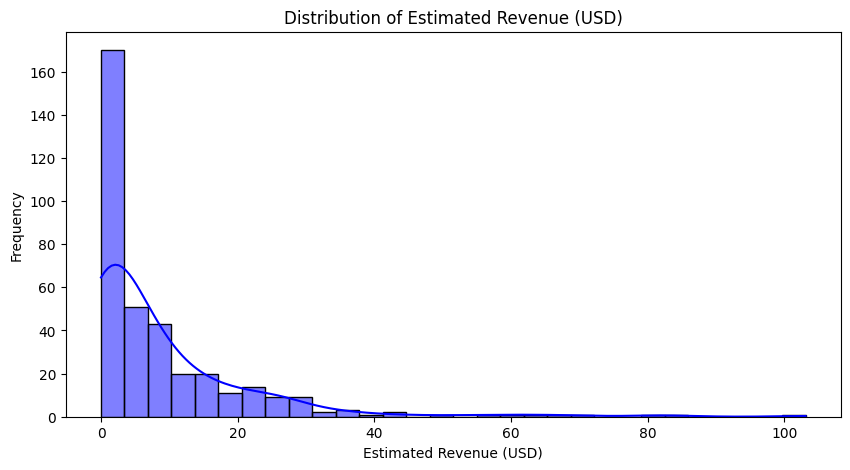

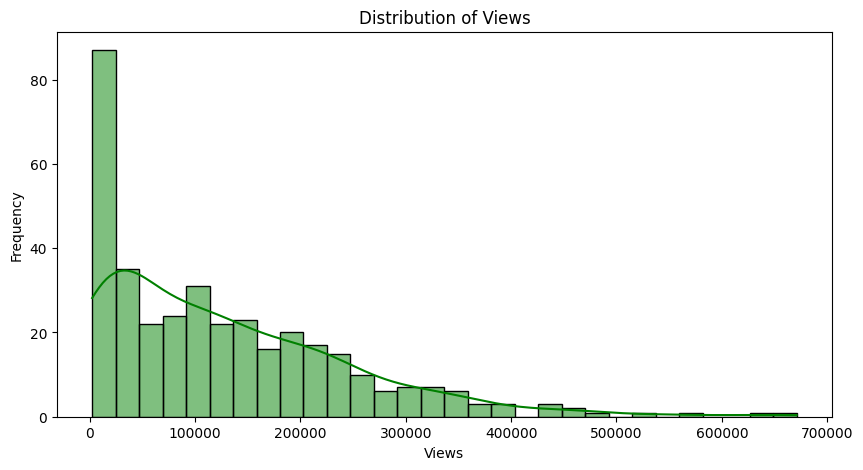

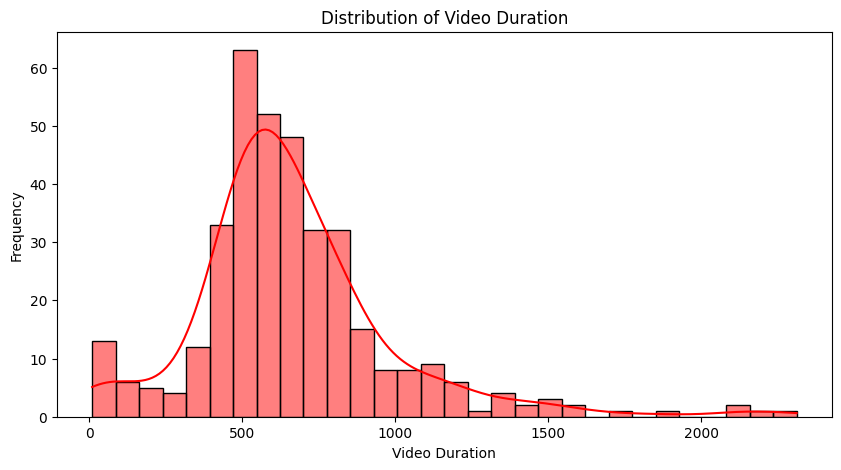

In [ ]:
# Distribution of Estimated Revenue (USD)
plt.figure(figsize=(10,5))
sns.histplot(data['Estimated Revenue (USD)'], bins=30, kde=True, color='b')

plt.xlabel('Estimated Revenue (USD)')
plt.ylabel('Frequency')

plt.title('Distribution of Estimated Revenue (USD)')
plt.show()

# Distribution of Views
plt.figure(figsize=(10,5))
sns.histplot(data['Views'], bins=30, kde=True, color='g')

plt.xlabel('Views')
plt.ylabel('Frequency')

plt.title('Distribution of Views')
plt.show()

# Distribution of Video Distribution
plt.figure(figsize=(10,5))
sns.histplot(data['Video Duration'], bins=30, kde=True, color='r')

plt.xlabel('Video Duration')
plt.ylabel('Frequency')

plt.title('Distribution of Video Duration')
plt.show()

**2.2 Identifying top performing videos by revenue or engagement/views**

In [ ]:
# Top 10 performing videos by revenue
top_performers = data.sort_values(by='Estimated Revenue (USD)',ascending=False).head(10)
print(top_performers[['ID', 'Estimated Revenue (USD)', 'Views', 'Subscribers']])

,ID,Estimated Revenue (USD),Views,Subscribers
228,228,103.117,670990.0,3538.0
257,257,83.979,241060.0,1125.0
251,251,80.265,343319.0,1437.0
289,289,70.247,99196.0,350.0
278,278,65.978,188324.0,1824.0
260,260,62.047,302999.0,866.0
293,293,59.058,101025.0,602.0
294,294,55.040,67556.0,581.0
290,290,50.344,89284.0,995.0
284,284,44.228,93487.0,305.0


**2.3 Create corelation Heatmap to spot related features**

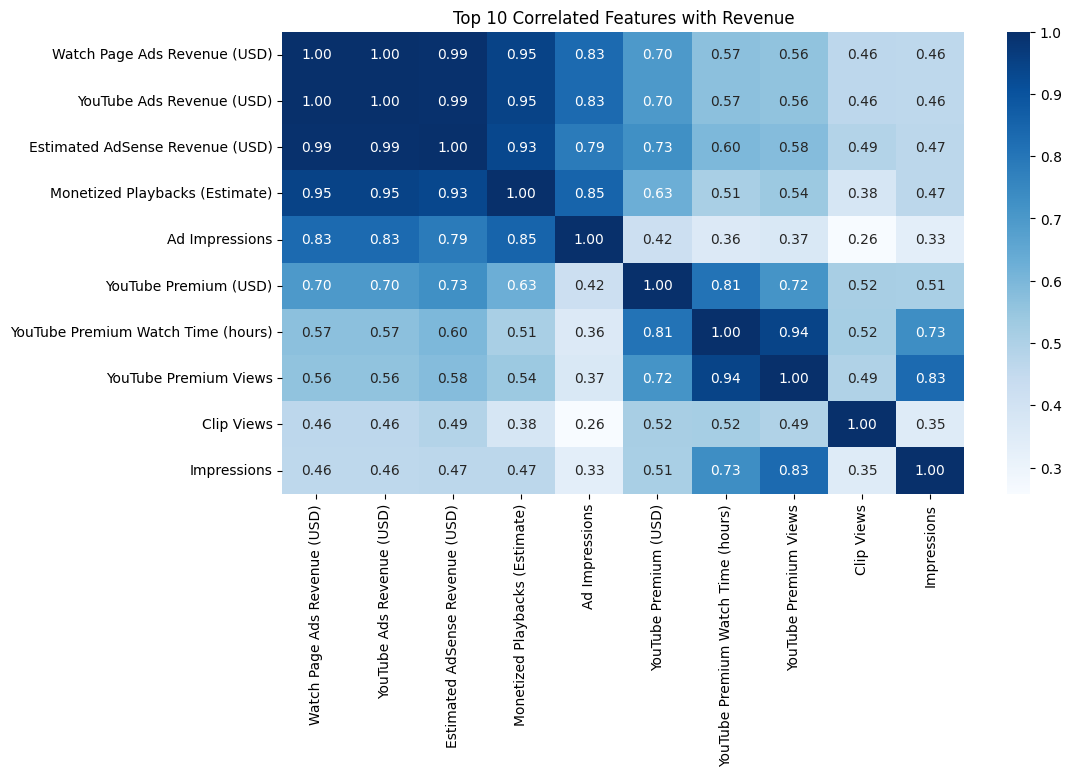

In [ ]:
# Extracting only numeric columns
numeric_columns = data.select_dtypes(include=['number'])

# Compute correlation Heatmap
correlation = numeric_columns.corr()

# Absolute correlation values with target
corr_with_revenues = correlation['Estimated Revenue (USD)'].abs()

# Top 10 features most correlated with Estimated Revenue (excluding itself)
top_corr = corr_with_revenues.sort_values(ascending=False)[1:11].index

# Filter correlation matrix
top_corr_matrix = data[top_corr].corr()

# Plot Heatmap
plt.figure(figsize=(11,6))
sns.heatmap(top_corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Top 10 Correlated Features with Revenue')
plt.show()


# **Step 3: Feature Engineering**

**3.1 Revenue per View**

In [ ]:
data['Revenue per view'] = data['Estimated Revenue (USD)'] / data['Views'].replace(0, np.nan) # Avoid Division by zero

# Fill the values of NaN's with zero (if any)
data['Revenue per view'] = data['Revenue per view'].fillna(0)

**3.2 Engagement Rate**

In [ ]:
# Add together major interaction metrics and divide by views
data['Engagement Rate (%)'] = ((data['Likes'] + data['Shares'] + data['New Comments']) / data['Views'].replace(0, np.nan)) *100

# Fill the values of NaN's with zero (if any)
data['Engagement Rate (%)'] = data['Engagement Rate (%)'].fillna(0)

**3.3 Watch-to-Click Ratio**

In [ ]:
# Ratio of Watch Time to Impressions
data['Watch per Impression'] = data['Watch Time (hours)'] / data['Impressions'].replace(0, np.nan)

# Fill the values of NaN's with zero (if any)
data['Watch per Impression'] = data['Watch per Impression'].fillna(0)

# **Step 4: Data Visualization**

**4.1 Histogram of Revenue Distribution**

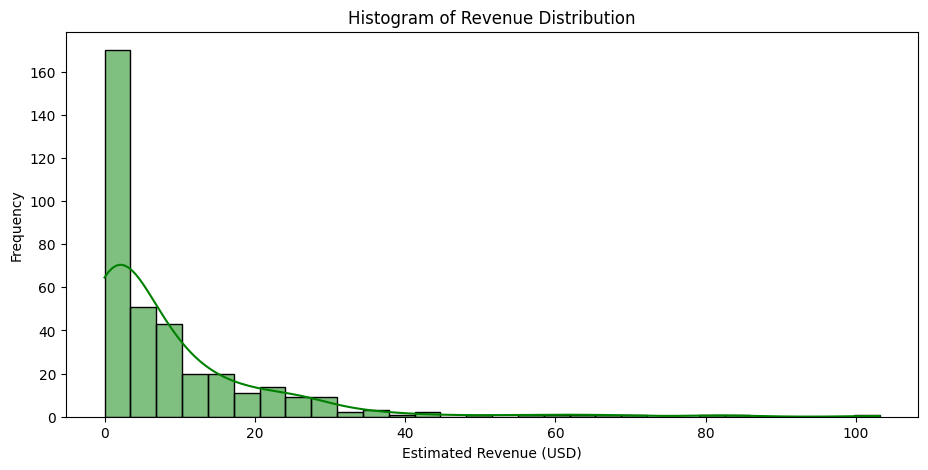

In [ ]:
plt.figure(figsize=(11,5))

sns.histplot(data['Estimated Revenue (USD)'], bins=30, kde=True, color='g')

plt.xlabel('Estimated Revenue (USD)')
plt.ylabel('Frequency')

plt.title('Histogram of Revenue Distribution')
plt.show()

**4.2 Revenue vs Views**

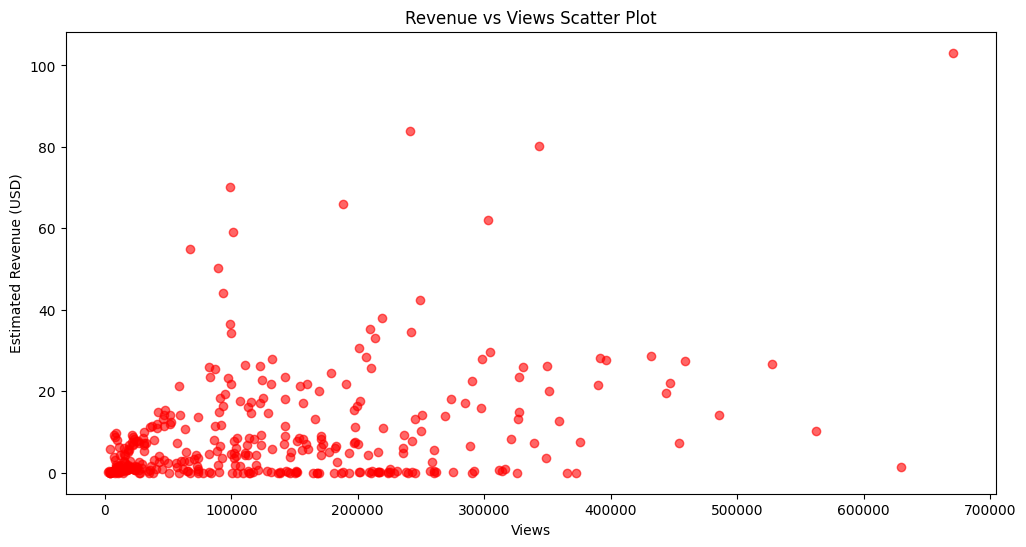

In [ ]:
plt.figure(figsize=(12,6))
x = data['Views']
y = data['Estimated Revenue (USD)']

plt.scatter(x, y, color='r', alpha=0.6)

plt.xlabel('Views')
plt.ylabel('Estimated Revenue (USD)')

plt.title('Revenue vs Views Scatter Plot')
plt.show()

**4.3 Engagement Rate vs Revenue**

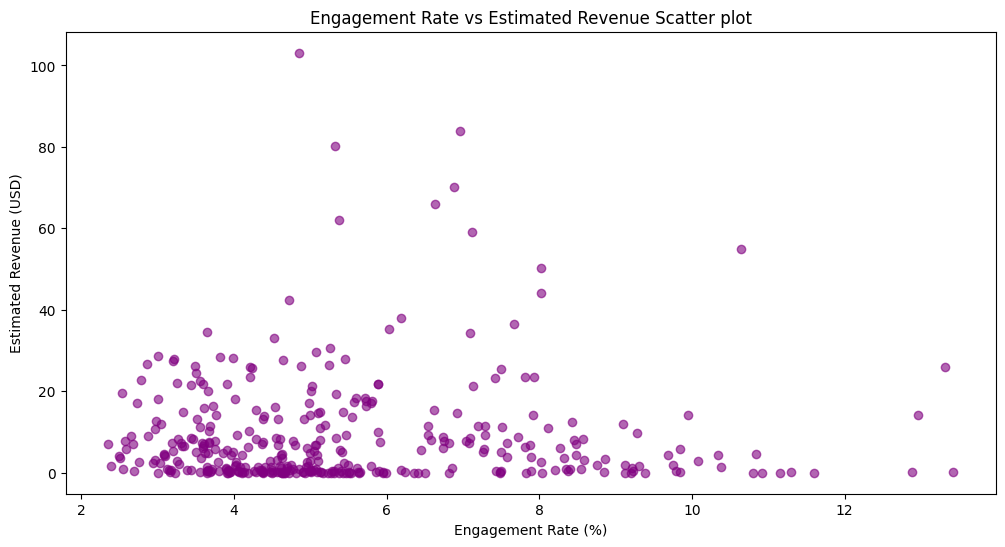

In [ ]:
plt.figure(figsize=(12,6))
x = data['Engagement Rate (%)']
y = data['Estimated Revenue (USD)']

plt.scatter(x, y, color='purple', alpha=0.6)

plt.xlabel('Engagement Rate (%)')
plt.ylabel('Estimated Revenue (USD)')

plt.title('Engagement Rate vs Estimated Revenue Scatter plot')
plt.show()

**4.4 Boxplot for Outlier Detection – Revenue**

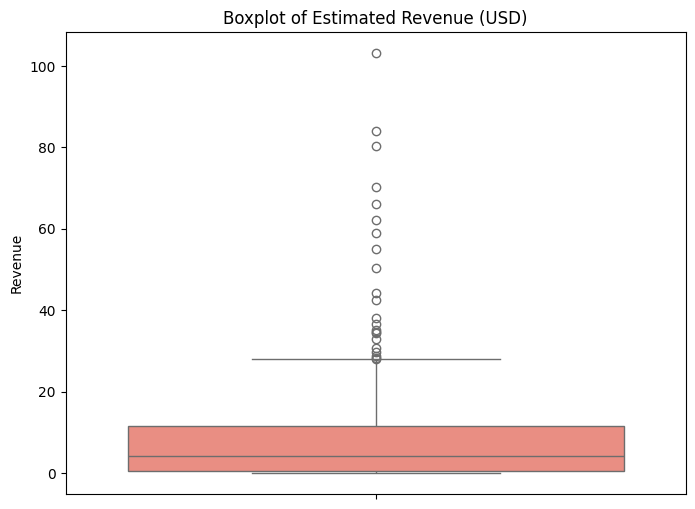

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y=data['Estimated Revenue (USD)'], color='salmon')
plt.title('Boxplot of Estimated Revenue (USD)')
plt.ylabel('Revenue')
plt.show()

# **Step 5: Predictive Modeling**

**5.1 Select Features & Target and Perform Model Training**

In [ ]:
# Select features for modelling (Correlation & logic)
features = data[['Views', 'Subscribers', 'Likes', 'Shares', 'New Comments', 'Engagement Rate (%)', 'Revenue per view']]
target = data['Estimated Revenue (USD)']

X = features                      # Independent variable
y = target                        # Dependent variable (target variable)

# Initialize and apply scaler
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1,1)).ravel()

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)      # 20% test 80% train

# Train RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)                 # Initialize model
model.fit(X_train, y_train)                                                     # Model training

# Predictions
y_pred = model.predict(X_test)                                                  # predicting on trained model

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error:{rmse: .2f}')
print(f'R2_Score/R-Squared:{r2: .2f}')

Root Mean Squared Error: 0.02
R2_Score/R-Squared: 0.94


# **Step 6: Insights & Recommendations**

**Feature Importance - What drives revenue?**

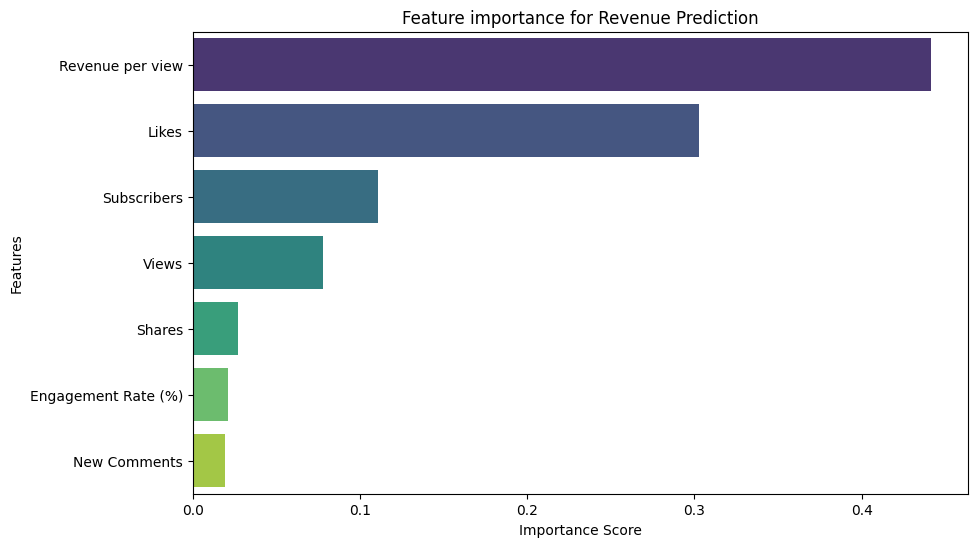

In [ ]:
# Feature columns
features_data = ['Views', 'Subscribers', 'Likes', 'Shares', 'New Comments', 'Engagement Rate (%)', 'Revenue per view']

# Get feature importance values
importances = model.feature_importances_

# Create a DataFrame
feature_importance_data = pd.DataFrame({
    'Feature': features_data,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_data, hue='Feature', palette='viridis')

plt.xlabel('Importance Score')
plt.ylabel('Features')

plt.title('Feature importance for Revenue Prediction')
plt.show()

# **Insights Based on Model & EDA**
**Here are key observations:**

- Views and Revenue per View remain the most influential factors in revenue prediction.

- Engagement Rate (%) continues to show a strong positive relationship with scaled revenue — high engagement leads to better monetization in most cases.

- Watch per Impression (watch time per impression) correlates well with scaled revenue, reinforcing the importance of viewer retention.

- A few videos have moderate views but high scaled revenue, suggesting that targeted high-CPM content can outperform viral videos with poor engagement.

- With 94% of the variance explained, your model shows very high accuracy. The small unexplained portion may be influenced by:

  - Video topic category

  - Seasonality or external promotions

  - Viewer location/language



**Recommendations:**


|  Area           | Recommendation                                                   |
| ----------------------- | ----------------------------------------------------------------------- |
| **Content Strategy**  | Make videos that get more **likes, shares, and comments**               |
| **Viewer Retention**    | Grab attention in the **first 30 seconds** to keep viewers watching     |
| **Monetization**    | Create videos on **high-paying topics** like tech, finance, or business |
| **Thumbnails & Titles** | Use eye-catching **thumbnails** and **titles** to increase clicks       |
| **Targeted Publishing**              | Post videos when your audience is most active (if data available)       |
| **Shorts/Clips**      | Use **clips and shorts** to reach new viewers and boost engagement      |








**Export Final Dataset (Cleaned) for Tableau Visualization**

In [ ]:
# Export the cleaned + engineered dataset
data.to_csv('YT360_Final_Dashboard_Data.csv', index=False)

# Export feature importance (optional for charts)
feature_importance_data.to_csv('YT360_Feature_Importance.csv', index=False)

In [ ]:
# View and Download the clean datasets
from google.colab import files                                    # If you run this cell the files automatically gets downloaded
files.download("YT360_Final_Dashboard_Data.csv")
files.download("YT360_Feature_Importance.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>